## **환경 설정**

In [6]:
#빅쿼리 접속
from google.oauth2 import service_account
from google.cloud import bigquery
credential_path = ""
credentials = service_account.Credentials.from_service_account_file(credential_path)
client = bigquery.Client(credentials=credentials, project='road-traffic-safety-388112')

#시각화 라이브러리 호출
import csv
import pandas as pd
import folium
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import json

#한글 설치
import os
if not os.name == 'posix':
    plt.rc("font", family="Malgun Gothic")

## **시각화 함수 외**

In [7]:
#그래프 함수
def draw_bar_chart(list_x, list_y, chart_title, color_list = '#003f7d'):
    plt.bar(list_x, list_y, color = color_list)
    plt.title(chart_title)
    plt.xticks(list_x, rotation = 45, ha = 'right')
    plt.show()
    
def draw_line_chart(list_x, list_y, chart_title, label_name = 'None', color_list ='#003f7d' ):
    plt.plot(list_x, list_y, marker='o', markersize=5, label = label_name, color = color_list)
    plt.legend()
    plt.xticks(rotation = 45, ha = 'right')
    plt.title(chart_title)
    plt.show()
    
def draw_pie_chart(list_x, list_y, chart_title, color_list = '#003f7d'):
    plt.pie(list_y, labels=list_x, autopct='%.1f%%', colors = color_list)
    plt.title(chart_title)
    plt.show()
    
#쿼리 실행 함수
def execute_query(query):
    go_query = query

    job = client.query(go_query)
    result = job.result()
    return result

## **검증**

#### p.16 19~22년도 시간대별 서울 시내 주요 도로 평균 속도

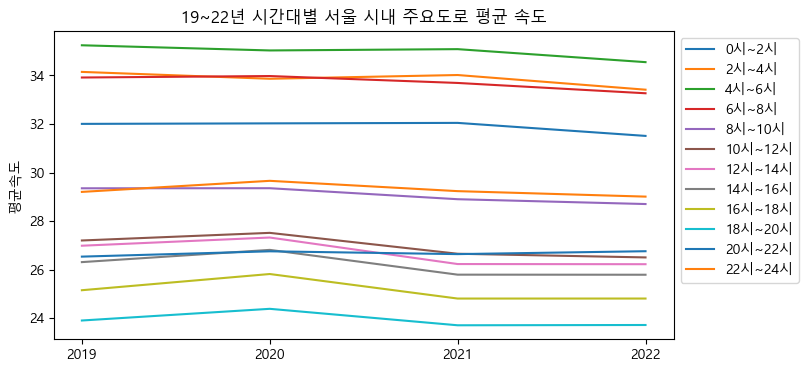

In [18]:
query2019 = f"""
SELECT EXTRACT(YEAR FROM dates) AS year,
(AVG(time24) + AVG(time1)) / 2 AS timeline1,
(AVG(time2)  + AVG(time3)) / 2 AS timeline2,
(AVG(time4)  + AVG(time5)) / 2 AS timeline3,
(AVG(time6)  + AVG(time7)) / 2 AS timeline4,
(AVG(time8)  + AVG(time9)) / 2 AS timeline5,
(AVG(time10) + AVG(time11)) /2 AS timeline6,
(AVG(time12) + AVG(time13)) /2 AS timeline7,
(AVG(time14) + AVG(time15)) /2 AS timeline8,
(AVG(time16) + AVG(time17)) /2 AS timeline9,
(AVG(time18) + AVG(time19)) /2 AS timeline10,
(AVG(time20) + AVG(time21)) /2 AS timeline11,
(AVG(time22) + AVG(time23)) /2 AS timeline12
FROM `road-traffic-safety-388112.Traffic_Accidents.Seoul_speed2019`
WHERE REGEXP_CONTAINS(road_name, r'도산대로|의사당대로|서초대로|강남대로|시흥대로|공항대로|세종대로|송파대로|마포대로|반포대로|사평대로|방화대로|한강대로|영동대로|동작대로|천호대로|양재대로|삼일대로|위례성대로|강동대로|가양대로|국회대로|한남대로|여의대로|녹사평대로')
GROUP BY year"""

query2020 = f"""
SELECT EXTRACT(YEAR FROM dates) AS year,
(AVG(time24) + AVG(time1)) / 2 AS timeline1,
(AVG(time2)  + AVG(time3)) / 2 AS timeline2,
(AVG(time4)  + AVG(time5)) / 2 AS timeline3,
(AVG(time6)  + AVG(time7)) / 2 AS timeline4,
(AVG(time8)  + AVG(time9)) / 2 AS timeline5,
(AVG(time10) + AVG(time11)) /2 AS timeline6,
(AVG(time12) + AVG(time13)) /2 AS timeline7,
(AVG(time14) + AVG(time15)) /2 AS timeline8,
(AVG(time16) + AVG(time17)) /2 AS timeline9,
(AVG(time18) + AVG(time19)) /2 AS timeline10,
(AVG(time20) + AVG(time21)) /2 AS timeline11,
(AVG(time22) + AVG(time23)) /2 AS timeline12
FROM `road-traffic-safety-388112.Traffic_Accidents.Seoul_speed_2020`
WHERE REGEXP_CONTAINS(road_name, r'도산대로|의사당대로|서초대로|강남대로|시흥대로|공항대로|세종대로|송파대로|마포대로|반포대로|사평대로|방화대로|한강대로|영동대로|동작대로|천호대로|양재대로|삼일대로|위례성대로|강동대로|가양대로|국회대로|한남대로|여의대로|녹사평대로')
GROUP BY year"""

query2021 = f"""
SELECT EXTRACT(YEAR FROM dates) AS year,
(AVG(time24) + AVG(time1)) / 2 AS timeline1,
(AVG(time2)  + AVG(time3)) / 2 AS timeline2,
(AVG(time4)  + AVG(time5)) / 2 AS timeline3,
(AVG(time6)  + AVG(time7)) / 2 AS timeline4,
(AVG(time8)  + AVG(time9)) / 2 AS timeline5,
(AVG(time10) + AVG(time11)) /2 AS timeline6,
(AVG(time12) + AVG(time13)) /2 AS timeline7,
(AVG(time14) + AVG(time15)) /2 AS timeline8,
(AVG(time16) + AVG(time17)) /2 AS timeline9,
(AVG(time18) + AVG(time19)) /2 AS timeline10,
(AVG(time20) + AVG(time21)) /2 AS timeline11,
(AVG(time22) + AVG(time23)) /2 AS timeline12
FROM `road-traffic-safety-388112.Traffic_Accidents.Seoul_speed2021`
WHERE REGEXP_CONTAINS(road_name, r'도산대로|의사당대로|서초대로|강남대로|시흥대로|공항대로|세종대로|송파대로|마포대로|반포대로|사평대로|방화대로|한강대로|영동대로|동작대로|천호대로|양재대로|삼일대로|위례성대로|강동대로|가양대로|국회대로|한남대로|여의대로|녹사평대로')
GROUP BY year"""

query2022 = f"""
SELECT EXTRACT(YEAR FROM dates) AS year,
(AVG(time24) + AVG(time1)) / 2 AS timeline1,
(AVG(time2)  + AVG(time3)) / 2 AS timeline2,
(AVG(time4)  + AVG(time5)) / 2 AS timeline3,
(AVG(time6)  + AVG(time7)) / 2 AS timeline4,
(AVG(time8)  + AVG(time9)) / 2 AS timeline5,
(AVG(time10) + AVG(time11)) /2 AS timeline6,
(AVG(time12) + AVG(time13)) /2 AS timeline7,
(AVG(time14) + AVG(time15)) /2 AS timeline8,
(AVG(time16) + AVG(time17)) /2 AS timeline9,
(AVG(time18) + AVG(time19)) /2 AS timeline10,
(AVG(time20) + AVG(time21)) /2 AS timeline11,
(AVG(time22) + AVG(time23)) /2 AS timeline12
FROM `road-traffic-safety-388112.Traffic_Accidents.Seoul_speed2022`
WHERE REGEXP_CONTAINS(road_name, r'도산대로|의사당대로|서초대로|강남대로|시흥대로|공항대로|세종대로|송파대로|마포대로|반포대로|사평대로|방화대로|한강대로|영동대로|동작대로|천호대로|양재대로|삼일대로|위례성대로|강동대로|가양대로|국회대로|한남대로|여의대로|녹사평대로')
GROUP BY year"""


query_list = [query2019, query2020, query2021, query2022]

result = []
for query in query_list:
    query_job = client.query(query)
    results = query_job.result()
    for row in results:
        result.append(row)

x_year = []
y_timeline1 = []
y_timeline2 = []
y_timeline3 = []
y_timeline4 = []
y_timeline5 = []
y_timeline6 = []
y_timeline7 = []
y_timeline8 = []
y_timeline9 = []
y_timeline10 = []
y_timeline11 = []
y_timeline12 = []


for row in result:
    year, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12 = row
    x_year.append(year)
    y_timeline1.append(y1)
    y_timeline2.append(y2)
    y_timeline3.append(y3)
    y_timeline4.append(y4)
    y_timeline5.append(y5)
    y_timeline6.append(y6)
    y_timeline7.append(y7)
    y_timeline8.append(y8)
    y_timeline9.append(y9)
    y_timeline10.append(y10)
    y_timeline11.append(y11)
    y_timeline12.append(y12)
plt.figure(figsize=(8, 4))

# 그래프 그리기
plt.plot(x_year, y_timeline1, label='0시~2시')
plt.plot(x_year, y_timeline2, label='2시~4시')
plt.plot(x_year, y_timeline3, label='4시~6시')
plt.plot(x_year, y_timeline4, label='6시~8시')
plt.plot(x_year, y_timeline5, label='8시~10시')
plt.plot(x_year, y_timeline6, label='10시~12시')
plt.plot(x_year, y_timeline7, label='12시~14시')
plt.plot(x_year, y_timeline8, label='14시~16시')
plt.plot(x_year, y_timeline9, label='16시~18시')
plt.plot(x_year, y_timeline10, label='18시~20시')
plt.plot(x_year, y_timeline11, label='20시~22시')
plt.plot(x_year, y_timeline12, label='22시~24시')

# #수치 표시
# for i, y_values in enumerate([y_timeline1, y_timeline2, y_timeline3, y_timeline4, y_timeline5, y_timeline6, y_timeline7, y_timeline8, y_timeline9, y_timeline10, y_timeline11, y_timeline12]):
#     for x, y in zip(x_year, y_values):
#         plt.text(x, y, '{:.2f}'.format(y), ha='center', va='bottom')


plt.ylabel('평균속도')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.xticks([2019, 2020, 2021, 2022])

# 그래프 표시
plt.title("19~22년 시간대별 서울 시내 주요도로 평균 속도")
plt.show()

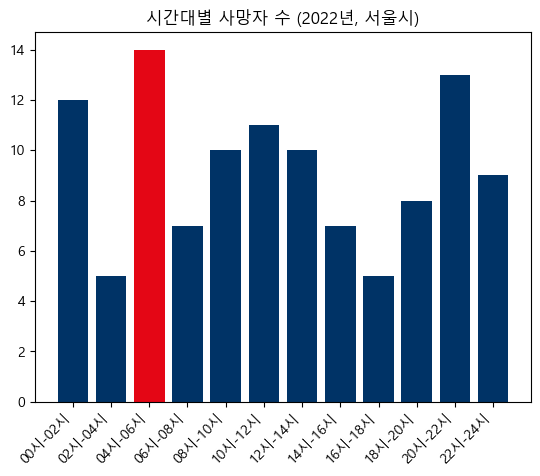

In [19]:
target_year = '2022'

by_year_query = f"""
SELECT
  hours,
  SUM(counts) AS total,
  SUM(death_toll) AS death_toll,
  SUM(serious_injury) AS serious_injury,
  SUM(minor_injury) AS minor_injury,
  SUM(injury_report) AS injury_report
FROM `Traffic_Accidents.Pedestrian_Hours_Seoul`
WHERE years = {target_year}
GROUP BY hours
ORDER BY hours;
"""

hour_list = []
total_list = []
death_list = []
serious_list = []
minor_list = []
report_list = []

for hour, total, death, serious, minor, report in execute_query(by_year_query):
    hour_list.append(hour)
    total_list.append(total)
    death_list.append(death)
    serious_list.append(serious)
    minor_list.append(minor)
    report_list.append(report)

colors = ['#003366', '#003366', '#E40615', '#003366', '#003366', '#003366', '#003366', '#003366', '#003366', '#003366']
draw_bar_chart(hour_list, death_list, chart_title = f"시간대별 사망자 수 ({target_year}년, 서울시)", color_list=colors)

#### p.16 연도별 사교 규모(심각성) 비중

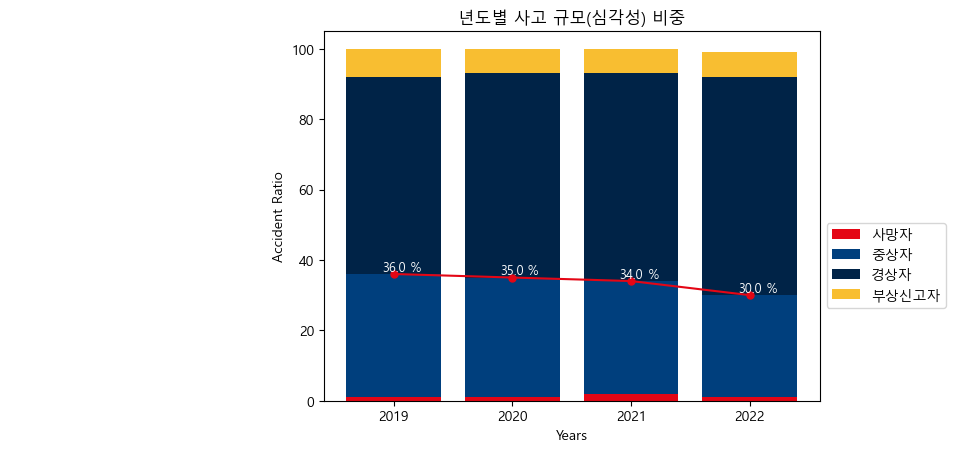

In [15]:
query = f"""
SELECT
  years,
  round(sum(death_toll) / (sum(death_toll) + sum(serious_injury) + sum(minor_injury) + sum(injury_report)) * 100) AS death_toll,
  round(sum(serious_injury) / (sum(death_toll) + sum(serious_injury) + sum(minor_injury) + sum(injury_report)) * 100) AS serious_injury,
  round(sum(minor_injury) / (sum(death_toll) + sum(serious_injury) + sum(minor_injury) + sum(injury_report)) * 100) AS minor_injury,
  round(sum(injury_report) / (sum(death_toll) + sum(serious_injury) + sum(minor_injury) + sum(injury_report)) * 100) AS injury_report
FROM `road-traffic-safety-388112.Traffic_Accidents.seoul_pedestrian_monthly`
GROUP BY years
ORDER BY years;
"""

# 쿼리 실행
query_job = client.query(query)

# 결과 가져오기
results = query_job.result()

query2 = f"""
SELECT
  years,
  (round(sum(death_toll) / (sum(death_toll) + sum(serious_injury) + sum(minor_injury) + sum(injury_report)) * 100)) + (round(sum(serious_injury) / (sum(death_toll) + sum(serious_injury) + sum(minor_injury) + sum(injury_report)) * 100)) AS death_toll
FROM `road-traffic-safety-388112.Traffic_Accidents.seoul_pedestrian_monthly`
GROUP BY years
ORDER BY years;
"""
query_job2 = client.query(query2)

# 결과 가져오기
results2 = query_job2.result()

# 결과 출력


years = []
death_toll  = []
serious_injury = []
minor_injury = []
injury_report = []

for year, death, serious, minor, injury in results:
    years.append(year)
    death_toll.append(death)
    serious_injury.append(serious)
    minor_injury.append(minor)
    injury_report.append(injury)


plt.bar(years, death_toll, label='사망자', color="#e40615")
plt.bar(years, serious_injury, bottom=death_toll, label='중상자', color="#003f7d")
plt.bar(years, minor_injury, bottom=[death_toll[i] + serious_injury[i] for i in range(len(death_toll))], label='경상자', color="#002347")
plt.bar(years, injury_report, bottom=[death_toll[i] + serious_injury[i] + minor_injury[i] for i in range(len(death_toll))], label='부상신고자', color="#f8be31")


years2 = []
death_toll2  = []

for year22, death22 in results2:
    years2.append(year22)
    death_toll2.append(death22)

plt.plot(years2, death_toll2, marker='o', markersize=5, color="#e40615")



plt.text(2019, 36, death_toll[0] + serious_injury[0],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='white',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')


plt.text(2019, 36, "          %",                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='white',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom') 


plt.text(2020, 35, death_toll[1] + serious_injury[1],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='white',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')

plt.text(2021, 34, death_toll[2] + serious_injury[2],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='white',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')

plt.text(2022, 30, death_toll[3] + serious_injury[3],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='white',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')

plt.text(2019, 35, "                                                                %",                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='white',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')
plt.text(2019, 34, "                                                                                                                       %",                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='white',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')
plt.text(2019, 30, "                                                                                                                                                                             %",                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='white',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')



plt.title("년도별 사고 규모(심각성) 비중")
plt.legend(bbox_to_anchor=(1.0, 0.5))


plt.xlabel('Years')
plt.ylabel('Accident Ratio')


plt.xticks(years)
plt.show()

#### p.16 연도별 횡단 사고 치사율

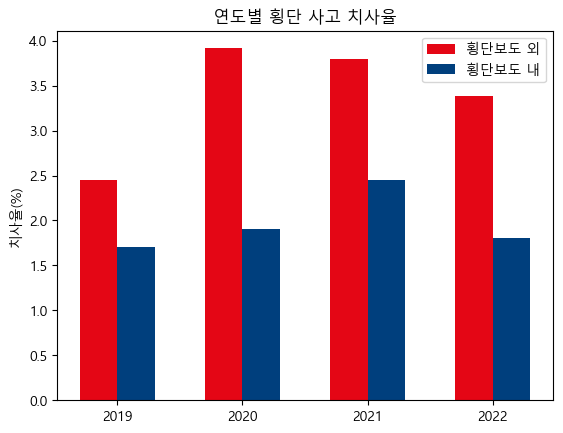

In [17]:
query1 = """
SELECT years,
    SUM(death_toll) AS death_toll,
    SUM(counts) AS counts,
    SUM(death_toll) / SUM(counts) * 100 AS death_per
FROM `road-traffic-safety-388112.Traffic_Accidents.Pedestrian_Type_Seoul`
WHERE accident_type = '횡단중'
GROUP BY years
"""
query_job1 = client.query(query1)

results1 = query_job1.result()

values = {}
for row in results1:
    year = row['years']
    death_toll = row['death_toll']
    counts = row['counts']
    values[year] = (death_toll, counts)

query2 = """
SELECT years,
    SUM(death_toll) AS death_toll,
    SUM(counts) AS counts,
    SUM(death_toll) / SUM(counts) * 100 AS death_per
FROM `road-traffic-safety-388112.Traffic_Accidents.Pedestrian_Jaywalking_Seoul`
GROUP BY years
"""
query_job2 = client.query(query2)

results2 = query_job2.result()

years1 = []
death_per_values1 = []
years2 = []
death_per_values2 = []

for row in results2:
    year = row['years']
    death_toll = row['death_toll']
    counts = row['counts']
    if year in values:
        diff_death_toll = values[year][0] - death_toll
        diff_counts = values[year][1] - counts
        years1.append(year)
        death_per_values1.append(row['death_per'])
        years2.append(year)
        death_per_values2.append(diff_death_toll / diff_counts * 100)

bar_width = 0.3
bar1_positions = [year - bar_width/2 for year in years1]
bar2_positions = [year + bar_width/2 for year in years2]

plt.bar(bar1_positions, death_per_values1, color='#e40615', width=bar_width, label='횡단보도 외')
plt.bar(bar2_positions, death_per_values2, color='#003f7d', width=bar_width, label='횡단보도 내')

plt.ylabel('치사율(%)')
plt.title('연도별 횡단 사고 치사율')
plt.xticks([2019, 2020, 2021, 2022], ['2019', '2020', '2021', '2022'])
plt.legend()
plt.show()